In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import keras.models
import tensorflow

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the Images
X = []
Y = []

for i in tqdm(glob('/kaggle/input/mrl-eye-dataset/data/train/open eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob('/kaggle/input/mrl-eye-dataset/data/train/close eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)

100%|██████████| 40380/40380 [06:13<00:00, 108.07it/s]


In [3]:
# Normalizing the images using Min-Max Scaling algorithm
X = (np.array(X) - np.min(X)) / (np.max(X) - np.min(X))
X = X/255.0
Y = (np.array(Y) - np.min(Y)) / (np.max(Y) - np.min(Y))

# Expanding the dimensions of array (numpy
X = np.expand_dims(X,-1)

In [4]:
# Spliting the dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [5]:
# CNN Model
from keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),    #Rectified Linear Unit
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

# Compiling the Model
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [6]:
# Training of the Model
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/HighAccModel.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    
    verbose =1)
# model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=callback)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[callback])

Epoch 1/100


2023-10-24 16:47:05.095675: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1369/1369 [==============================] - ETA: 0s - loss: 0.1778 - accuracy: 0.9308
Epoch 1: val_loss improved from inf to 1.50218, saving model to /kaggle/working/HighAccModel.h5
1369/1369 [==============================] - 38s 15ms/step - loss: 0.1778 - accuracy: 0.9308 - val_loss: 1.5022 - val_accuracy: 0.5815
Epoch 2/100
1365/1369 [============================>.] - ETA: 0s - loss: 0.0802 - accuracy: 0.9718
Epoch 2: val_loss improved from 1.50218 to 0.78072, saving model to /kaggle/working/HighAccModel.h5
1369/1369 [==============================] - 20s 15ms/step - loss: 0.0803 - accuracy: 0.9718 - val_loss: 0.7807 - val_accuracy: 0.7359
Epoch 3/100
1365/1369 [============================>.] - ETA: 0s - loss: 0.0637 - accuracy: 0.9781
Epoch 3: val_loss did not improve from 0.78072
1369/1369 [==============================] - 20s 14ms/step - loss: 0.0638 - accuracy: 0.9780 - val_loss: 3.5417 - val_accuracy: 0.5649
Epoch 4/100
1368/1369 [============================>.] - ETA: 0s - 

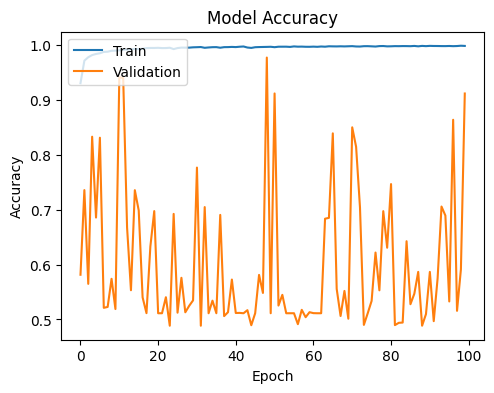

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

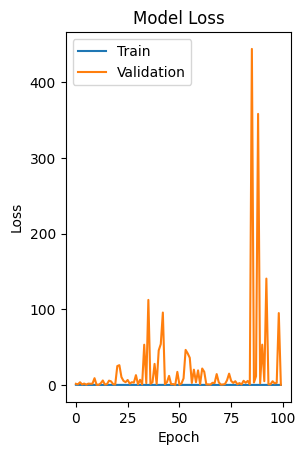

In [8]:
# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
# Model Evaluation
model.evaluate(x_test, y_test)

# Loading the Model Performance
from keras.models import load_model
best_model = load_model('/kaggle/working/HighAccModel.h5')
best_model.evaluate(x_test, y_test)

843/843 [==============================] - 4s 4ms/step - loss: 0.1000 - accuracy: 0.9764


[0.09998151659965515, 0.9764033555984497]

1/1 [==============================] - 0s 189ms/step


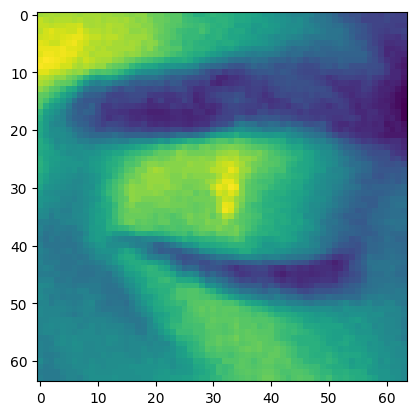

Closed
1/1 [==============================] - 0s 21ms/step


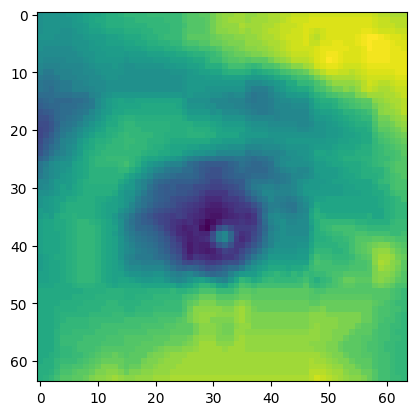

Open
1/1 [==============================] - 0s 21ms/step


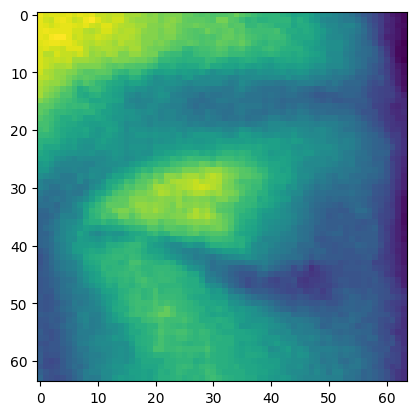

Closed
1/1 [==============================] - 0s 21ms/step


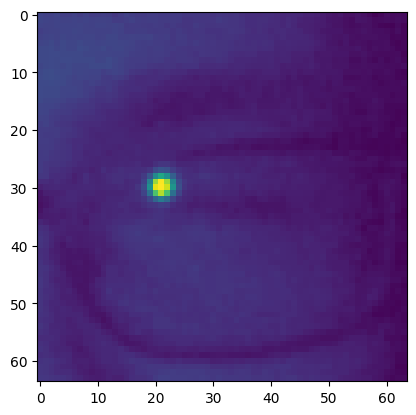

Closed
1/1 [==============================] - 0s 19ms/step


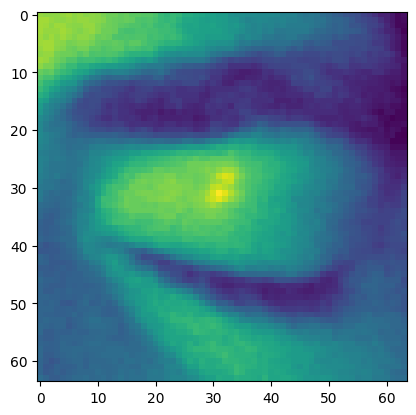

Closed


In [10]:
# Changing the dimensions and Plotting the trained images
for i in x_test[0:5]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

843/843 [==============================] - 2s 3ms/step


Text(0.5, 25.722222222222214, 'Actual')

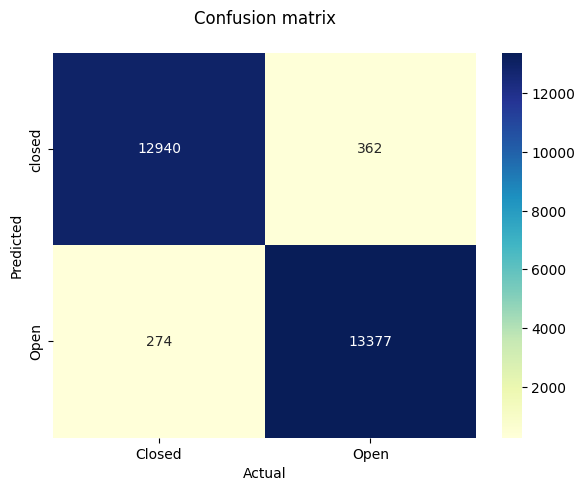

In [11]:
# Prediction and Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [12]:
# Accuracy
accuracy = best_model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)

843/843 [==============================] - 4s 4ms/step - loss: 0.1000 - accuracy: 0.9764
Accuracy: 0.9764033555984497


843/843 [==============================] - 4s 4ms/step - loss: 0.1000 - accuracy: 0.9764
Accuracy: 0.9764033555984497
843/843 [==============================] - 2s 3ms/step


Text(0.5, 25.722222222222214, 'Actual')

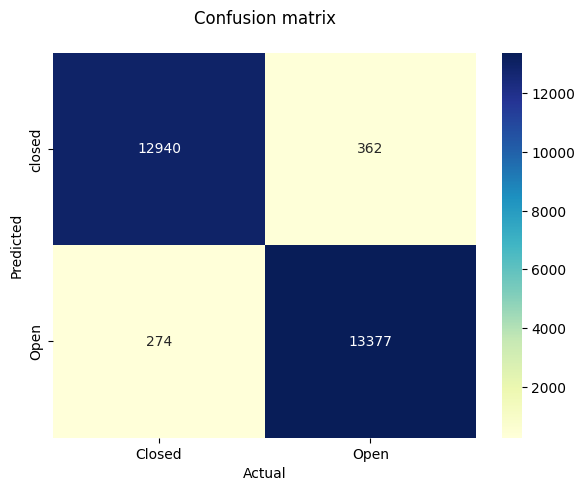

In [13]:
# Accuracy
accuracy = best_model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)
# Prediction and Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [14]:
# F1 Score
f1 = f1_score(y_test, preds)
print("F1 Score:", f1)

# Accuracy
accuracy = best_model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)

F1 Score: 0.9767798466593648
843/843 [==============================] - 4s 4ms/step - loss: 0.1000 - accuracy: 0.9764
Accuracy: 0.9764033555984497
